In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [61]:
from google.colab import files

uploaded = files.upload()

Saving covid_19_data_tr2.csv to covid_19_data_tr2 (1).csv


In [62]:
df= pd.read_csv("./covid_19_data_tr2.csv")

In [63]:
df.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Last_Update
0,NaN,Turkey,1,0,0,3/11/2020
1,NaN,Turkey,1,0,0,3/12/2020
2,NaN,Turkey,5,0,0,3/13/2020
3,NaN,Turkey,5,0,0,3/14/2020
4,NaN,Turkey,18,0,0,3/15/2020


In [64]:
df.tail(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Last_Update
105,NaN,Turkey,191657,5025,164234,6/24/2020
106,NaN,Turkey,193115,5046,165706,6/25/2020
107,NaN,Turkey,194511,5065,167198,6/26/2020
108,NaN,Turkey,195883,5082,169182,6/27/2020
109,NaN,Turkey,197239,5097,170595,6/28/2020


In [65]:
df.describe()

,Province/State,Confirmed,Deaths,Recovered
count,0.0,110.000000,110.000000,110.000000
mean,NaN,106460.754545,2819.009091,70341.918182
std,NaN,68108.428977,1889.994226,63403.451633
min,NaN,1.000000,0.000000,0.000000
25%,NaN,35138.250000,746.750000,1648.000000
50%,NaN,128575.000000,3490.500000,70725.500000
75%,NaN,164562.250000,4557.250000,128703.500000
max,NaN,197239.000000,5097.000000,170595.000000


In [66]:
df["Last_Update"]=pd.to_datetime(df["Last_Update"])

In [67]:
datewise=df.groupby(["Last_Update"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [68]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Aktif Vaka Sayısının Dağılımı",
                  xaxis_title="Date",yaxis_title="Vaka Sayısı",)
fig.show()

In [69]:
fig=px.bar(x=datewise.index,y=datewise["Deaths"])
fig.update_layout(title="Ölüm Sayısının Artışı",
                  xaxis_title="Date",yaxis_title="Ölüm Sayısı",)
fig.show()

In [70]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Hastalığın Bittiği Vaka Sayısının Dağılımı",
                  xaxis_title="Date",yaxis_title="Vaka Sayısı",)
fig.show()

In [71]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]

w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

Text(0.5, 1.0, 'Ölüm Sayısının Haftalık Artışı')

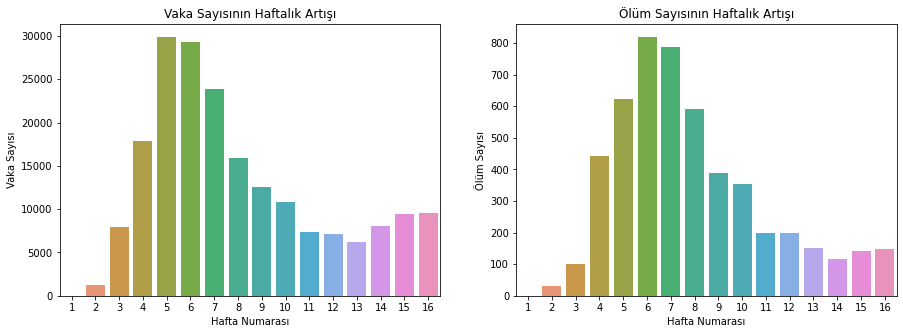

In [72]:
fig=go.Figure()
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Hafta Numarası")
ax2.set_xlabel("Hafta Numarası")
ax1.set_ylabel("Vaka Sayısı")
ax2.set_ylabel("Ölüm Sayısı")
ax1.set_title("Vaka Sayısının Haftalık Artışı")
ax2.set_title("Ölüm Sayısının Haftalık Artışı")